# Starting Objective
### I'm going to create a logistic regression classifier. And add the normal equation in addition to gradient descent.

## Details
- Convert from gradient descent to the normal equation
- Convert prediction function by wrapping current with sigmoid function
- Convert cost function and gradient descent for logistic regression
- Regularize my input
- Use advanced optimization algorithms

In [1]:
from __future__ import division
from scipy import special as scipy

import numpy as np
import math

In [60]:
# class LogisticClassifier:
    
#     theta = [0, 0]
#     alpha = 0.01
#     epoch = 300

#     # Constructor
#     def __init__(self, theta_size=2, alpha=0.01, epoch=5, threshold=0.5):
#         self.theta = [0] * theta_size
#         self.alpha = alpha
#         self.epoch = epoch
#         self.threshold = threshold
    
    
#     # Given input x of length of j(theta_size-1)
#     # Returns m(#examples) x 1 matrix of yhat
#     def predict_linear(self, x):
#         x = np.insert(x, 0, 1, axis=1)
#         x = np.matrix(x)
#         theta = np.matrix(self.theta)
#         theta = theta.T
#         return np.matmul(x, theta)

    
#     def sigmoid(self, x):
#         for a in range(x.shape[5]):
#                 x.item(a) = 1 / (1 + math.item(a))
#         return x
    
    
#     # Given training data Xtr and Ytr
#     def train(self, Xtr, Ytr):        
#         Ytr = np.matrix(Ytr)
#         Xtr = np.matrix(Xtr)
#         Ytr = Ytr.T
#         self.gradient_des(Xtr, Ytr)
        
        
#     # Given predictions(Yhat) and correct labels(Yte)
#     # Returns squared error
#     def cost_fcn(self, Yhat, Yte):
#         squared_error = (Yhat - Yte)**2
#         b = 1/(Yhat.size*2)
#         return b * np.sum(squared_error, 0)
    
    
#     # Given training data Xtr and Ytr
#     # Graphs error over iterations of gradient descent
#     def gradient_des(self, Xtr, Ytr):
# #         j2 = np.zeros(self.epoch)
# #         i2 = np.zeros(self.epoch)
#         for i in range(0, self.epoch):
#             Yhat = self.predict_linear(Xtr)
# #             print(Yhat)
#             Yhat = self.sigmoid(Yhat)
#             print(Yhat)
#             Ytr = np.matrix(Ytr)
#             Xtr = np.matrix(Xtr)
            
#             self.theta -= self.alpha * (Yhat - Ytr) * Xtr
# #             j2[i] = self.cost_fcn(Yhat.A1, Ytr.A1)  # .A1 turns matrix -> array
# #             i2[i] = i
# #         plt.xlabel("Iterations")
# #         plt.ylabel("Error")
# #         plt.plot(i2, j2)

SyntaxError: can't assign to function call (<ipython-input-60-355f69c53e01>, line 27)

In [61]:
# # theta = []

# X = [[10], [20], [30], [40], [50], [60], [15]]
# Y = [1, 1, 1, 0, 0, 1]
# Xtr = X[0:5]
# Ytr = Y[0:5]
# Xte = X[5:6]
# Yte = Y[5:6]

# model = LogisticClassifier()
# model.train(Xtr, Ytr)
# print(model.predict_logistic(Xte))

[[0]]
[[0]]
[[0]]
[[0]]
[[0]]


ValueError: shapes (5,1) and (5,1) not aligned: 1 (dim 1) != 5 (dim 0)

### Ok... compared to Octave this is quite impractical. I'm going to switch over to tensorflow. This sigmoid function that can't be applied to a matrix in a vectorized fashion is lame. 

### Going to expand it to another repo, then come back here.

### Ok, just read the TensorFlow documentation. Let's try this again

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import uniform, randint

In [20]:
class LinearClassifier:

    weights = tf.random_uniform([1,2], dtype=tf.float32)
    learning_rate = uniform(0.0001, 0.001)
    epoch = randint(10, 50)

    
    # Initalizes parameters for new model
    def init(self, new_weights, new_alpha, new_epoch):
        self.theta = new_weights
        self.alpha = new_alpha
        self.epoch = new_epoch    
    
    
    # Given Xhat (Examples x Features)
    # Where Xhat has a rank of 2
    # Returns Yhat (Labels x 1)
    def predict(self, X):
        ones = tf.ones([tf.shape(X)[0], 1], tf.float32)
        x = tf.concat([ones, X], 1)
        x = tf.matmul(x, tf.transpose(self.weights))
        return x
        
        
    # Given predictions(Yhat) and correct labels(Yte)
    # Returns squared mean error
    def cost(self, Yhat, Y):
        squared_error = (Yhat - Y)**2
        b = 1/tf.shape(Yhat)[0]   
        return tf.cast(b, tf.float32) * tf.reduce_sum(squared_error)
    
    
    # Given training data X and Y
    # Updates weights with gradient descent
    def train(self, X, Y):
        for i in range(0, self.epoch):
            Yhat = self.predict(X)
            self.weights -= self.learning_rate * tf.transpose(Yhat - Y) * tf.transpose(X)
            
            
    def train_curve(self, X, Y):
        c = np.zeros(self.epoch)
        it = np.zeros(self.epoch)
        for i in range(0, self.epoch):
            Yhat = self.predict(X)
            self.weights -= self.learning_rate * tf.transpose(Yhat - Y) * tf.transpose(X)
            
            squared_error = (Yhat - Y)**2
            b = 1/tf.shape(Yhat)[0]   
            c[i] = (tf.cast(b, tf.float32) * tf.reduce_sum(squared_error)).eval()
            it[i] = i
            
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.plot(it, c)

Input
[[10.]
 [15.]]

Weights and epoch and learning rate
[[0.8533633  0.43676817]]
36
0.00011655301

Weights trained
[[0.7582725 1.3488677]]

Correct Weights
[[2 2]]

Thus training is successful


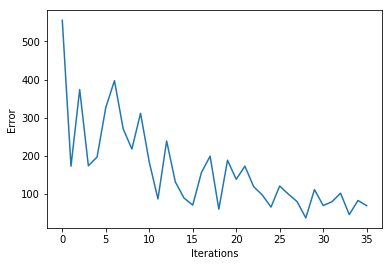

In [21]:
# TESTING TRAIN FUNCTION

with tf.Session() as sess:
    X = tf.Variable([[10],[15]], dtype=tf.float32)
    Y = tf.Variable([[20],[30]], dtype=tf.float32) 
    sess.run(tf.global_variables_initializer())
    
    model = LinearClassifier()    
    Yhat = model.predict(X)

    print("Input")
    r = X
    t = tf.Print(r, [r])
    print(sess.run(t))
    
    print("\nWeights and epoch and learning rate")
    r = model.weights
    t = tf.Print(r, [r])
    r2 = model.epoch
    t2 = tf.Print(r2, [r2])
    r3 = model.learning_rate
    t3 = tf.Print(r3, [r3])
    print(sess.run(t))
    print(sess.run(t2))
    print(sess.run(t3))
    
    model.train_curve(X, Y)
    r = model.weights
    t = tf.Print(r, [r])
    
    print("\nWeights trained")
    print(sess.run(t))
    print("\nCorrect Weights")
    print("[[2 2]]")
    
    print("\nThus training is successful")

In [12]:
# TESTING COST FUNCTION

with tf.Session() as sess:
    X = tf.Variable([[7],[11]], dtype=tf.float32)
    Y = tf.Variable([[14],[22]], dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    
    model = LinearClassifier()
    Yhat = model.predict(X)
    cost = model.cost(Yhat, Y)

    print("Input")
    r = X
    t = tf.Print(r, [r])
    print(sess.run(t))
    
    print("\nWeights")
    r = model.weights
    t = tf.Print(r, [r])
    print(sess.run(t))

    print("\nYhat vs Y")
    r = Y
    t = tf.Print(r, [r])
    r2 = Yhat
    t2 = tf.Print(r2, [r2])
    print("{} vs {}".format(sess.run(t2)[0], sess.run(t)[0]))
    print("{} vs {}".format(sess.run(t2)[1], sess.run(t)[1]))

    print("\nExpected Cost")
    r = ((Yhat[0]-14)**2 + (Yhat[1]-22)**2)/2
    t = tf.Print(r, [r])
    print(sess.run(t))
    
    print("\nCost")
    r = cost
    t = tf.Print(r, [r])
    print(format(sess.run(t)))
    
    print("\nThus squared mean error (COST) works")

Input
[[ 7.]
 [11.]]

Weights
[[0.36937308 0.8242594 ]]

Yhat vs Y
[1.6386749] vs [14.]
[2.2920105] vs [22.]

Expected Cost
[110.69661]

Cost
266.60003662109375

Thus squared mean error (COST) works


In [228]:
# TESTING PREDICT FUNCTION

with tf.Session() as sess:    
    if 'Xhat' not in globals():
        Xhat = tf.get_variable("Xhat", [5,1]) # tf.float32, tf.glorot_uniform_initializer, by default
    sess.run(tf.global_variables_initializer())
    
    model = LinearClassifier()
    Yhat = model.predict(Xhat)
    
    print("Input")
    a = Xhat
    b = tf.Print(a, [a])
    print(sess.run(b))
    
    print("\nWeights")
    c = model.weights
    d = tf.Print(c, [c])
    print(sess.run(d))
    
    print("\nPrediction")
    e = Yhat
    f = tf.Print(e, [e])
    print(sess.run(f))

    print("\n1st Element Expectation")
    k = model.weights[0,0]*1 + model.weights[0,1]*Xhat[0,0]
    p = tf.Print(k, [k])
    print("{} vs {}".format(sess.run(p), sess.run(f)[0]))
    
    print("\nThus PREDICT works")

Input
[[ 0.8169346 ]
 [-0.76930904]
 [ 0.48448038]
 [-0.82258797]
 [ 0.31413054]]

Weights
[[0.3696115 0.964466 ]]

Prediction
[[ 1.1575172 ]
 [-0.3723609 ]
 [ 0.83687633]
 [-0.4237466 ]
 [ 0.67257977]]

1st Element Expectation
1.1575171947479248 vs [1.1575172]

Thus PREDICT works


In [229]:
# TF TEST: PRINTING TENSOR
with tf.Session() as sess:
    r = tf.random_uniform([1])
    p = tf.Print(r, [r])
    print(r)
    print(sess.run(p))

Tensor("random_uniform_214:0", shape=(1,), dtype=float32)
[0.31084228]


In [230]:
# TF TEST: TENSOR OPERATIONS
with tf.Session() as sess:
    a = tf.Variable([[7],[11]], tf.int16)
    b = tf.Variable([[20],[11]], tf.int16)
    sess.run(tf.global_variables_initializer())
    
    r = (a - b)**2
    p = tf.Print(r, [r])
    print(sess.run(p))

[[169]
 [  0]]
